[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


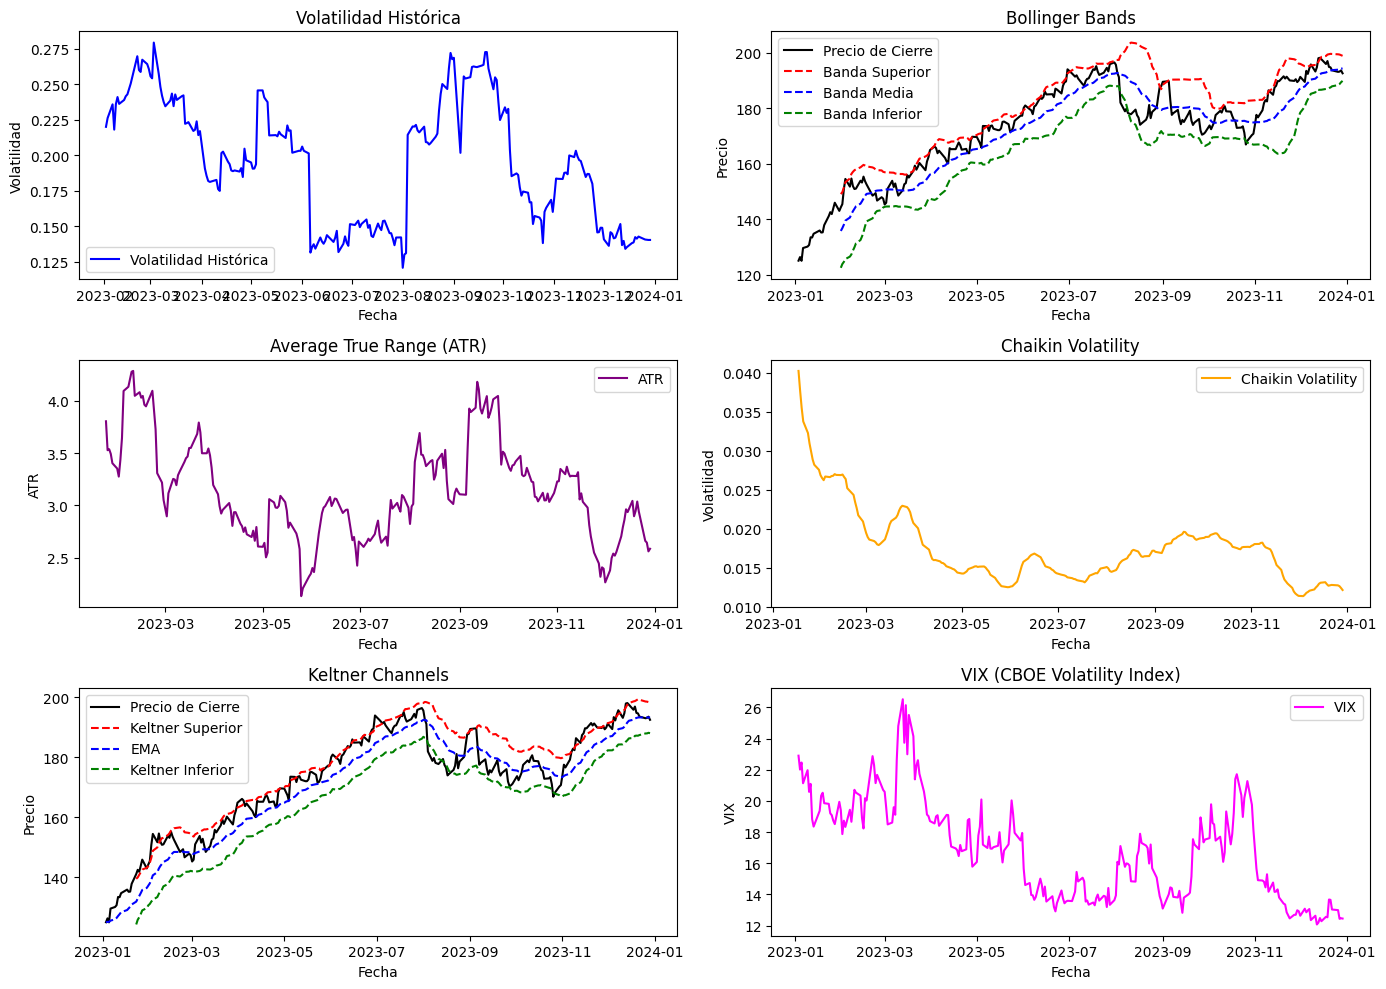

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Descargar datos históricos de Apple
ticker = 'AAPL'
data = yf.download(ticker, start='2023-01-01', end='2024-01-01')

# Descargar datos históricos del VIX
vix_data = yf.download('^VIX', start='2023-01-01', end='2024-01-01')

# Calcular rendimientos logarítmicos
data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1))

# Calcular Volatilidad Histórica
data['Historical Volatility'] = data['Log Returns'].rolling(window=21).std() * np.sqrt(252)

# Calcular Bollinger Bands
data['Middle Band'] = data['Close'].rolling(window=20).mean()
data['Upper Band'] = data['Middle Band'] + 2 * data['Close'].rolling(window=20).std()
data['Lower Band'] = data['Middle Band'] - 2 * data['Close'].rolling(window=20).std()

# Calcular ATR (Average True Range)
data['High-Low'] = data['High'] - data['Low']
data['High-Close'] = np.abs(data['High'] - data['Close'].shift(1))
data['Low-Close'] = np.abs(data['Low'] - data['Close'].shift(1))
data['True Range'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
data['ATR'] = data['True Range'].rolling(window=14).mean()

# Calcular Chaikin Volatility
data['EMA High'] = data['High'].ewm(span=10, adjust=False).mean()
data['EMA Low'] = data['Low'].ewm(span=10, adjust=False).mean()
data['Chaikin Volatility'] = ((data['EMA High'] - data['EMA Low']) / data['EMA Low']).rolling(window=10).mean()

# Calcular Keltner Channels
data['EMA Close'] = data['Close'].ewm(span=20, adjust=False).mean()
data['Upper Keltner'] = data['EMA Close'] + data['ATR'] * 2
data['Lower Keltner'] = data['EMA Close'] - data['ATR'] * 2

# Gráficos
plt.figure(figsize=(14, 10))

# Volatilidad Histórica
plt.subplot(3, 2, 1)
plt.plot(data.index, data['Historical Volatility'], label='Volatilidad Histórica', color='blue')
plt.title('Volatilidad Histórica')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.legend()

# Bollinger Bands
plt.subplot(3, 2, 2)
plt.plot(data.index, data['Close'], label='Precio de Cierre', color='black')
plt.plot(data.index, data['Upper Band'], label='Banda Superior', linestyle='--', color='red')
plt.plot(data.index, data['Middle Band'], label='Banda Media', linestyle='--', color='blue')
plt.plot(data.index, data['Lower Band'], label='Banda Inferior', linestyle='--', color='green')
plt.title('Bollinger Bands')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()

# ATR
plt.subplot(3, 2, 3)
plt.plot(data.index, data['ATR'], label='ATR', color='purple')
plt.title('Average True Range (ATR)')
plt.xlabel('Fecha')
plt.ylabel('ATR')
plt.legend()

# Chaikin Volatility
plt.subplot(3, 2, 4)
plt.plot(data.index, data['Chaikin Volatility'], label='Chaikin Volatility', color='orange')
plt.title('Chaikin Volatility')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.legend()

# Keltner Channels
plt.subplot(3, 2, 5)
plt.plot(data.index, data['Close'], label='Precio de Cierre', color='black')
plt.plot(data.index, data['Upper Keltner'], label='Keltner Superior', linestyle='--', color='red')
plt.plot(data.index, data['EMA Close'], label='EMA', linestyle='--', color='blue')
plt.plot(data.index, data['Lower Keltner'], label='Keltner Inferior', linestyle='--', color='green')
plt.title('Keltner Channels')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()

# VIX
plt.subplot(3, 2, 6)
plt.plot(vix_data.index, vix_data['Close'], label='VIX', color='magenta')
plt.title('VIX (CBOE Volatility Index)')
plt.xlabel('Fecha')
plt.ylabel('VIX')
plt.legend()

plt.tight_layout()
plt.show()
